In [38]:
import pandas as pd
import numpy as np

In [39]:
df_educação = pd.read_csv('Var_Educa.csv',encoding='latin1')
df_educação.rename(columns={'IDEB  Anos finais do ensino fundamental (Rede pública)':'IDEB fundamental'},inplace=True)
df_educação.drop(['Gentílico'],axis=1,inplace=True)

columns_int = ['Matrículas no ensino fundamental','Matrículas no ensino médio','Docentes no ensino fundamental','Docentes no ensino médio','População no último censo']
for coluna in columns_int:
    df_educação[coluna] = df_educação[coluna].str.extract(r'(\d+)', expand=False)  # Extrai números
    df_educação[coluna] = pd.to_numeric(df_educação[coluna], errors='coerce')  # Converte para números
df_educação

,Municípios,IDEB fundamental,Matrículas no ensino fundamental,Matrículas no ensino médio,Docentes no ensino fundamental,Docentes no ensino médio,População no último censo
0,Acauã,5.6,764,228,53,15,6420
1,Agricolândia,5.2,661,208,54,27,4940
2,Água Branca,5.6,2454,606,161,53,17573
3,Alagoinha do Piauí,5.7,750,165,61,18,6819
4,Alegrete do Piauí,5,568,151,44,17,4634
...,...,...,...,...,...,...,...
219,Várzea Branca,3.7,786,154,47,19,5055
220,Várzea Grande,4.7,473,129,26,11,4417
221,Vera Mendes,4.5,410,111,39,13,3185
222,Vila Nova do Piauí,6,299,70,43,12,2935


In [40]:
df_educação['Matrículas no ensino fundamental'].describe()

count       224.000000
mean       1960.316964
std        7337.773482
min         187.000000
25%         587.750000
50%         812.000000
75%        1507.000000
max      107058.000000
Name: Matrículas no ensino fundamental, dtype: float64

Aqui estou correlacionando as variaveis 

In [41]:
df_teste = df_educação.drop(columns=['Municípios','População no último censo'])
df_teste['IDEB fundamental']= df_teste['IDEB fundamental'].replace('-', np.nan)
df_teste['IDEB fundamental'] = df_teste['IDEB fundamental'].astype(float)
df_teste.corr()





,IDEB fundamental,Matrículas no ensino fundamental,Matrículas no ensino médio,Docentes no ensino fundamental,Docentes no ensino médio
IDEB fundamental,1.000000,0.129213,0.135403,0.126409,0.142793
Matrículas no ensino fundamental,0.129213,1.000000,0.998792,0.996903,0.997018
Matrículas no ensino médio,0.135403,0.998792,1.000000,0.995645,0.998760
Docentes no ensino fundamental,0.126409,0.996903,0.995645,1.000000,0.995136
Docentes no ensino médio,0.142793,0.997018,0.998760,0.995136,1.000000


### Testando

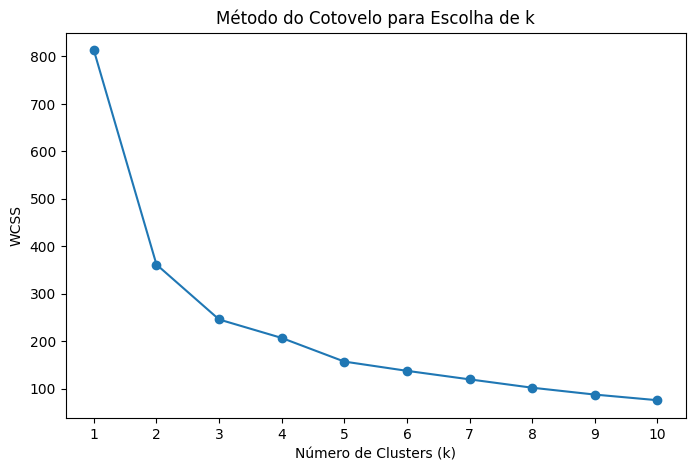

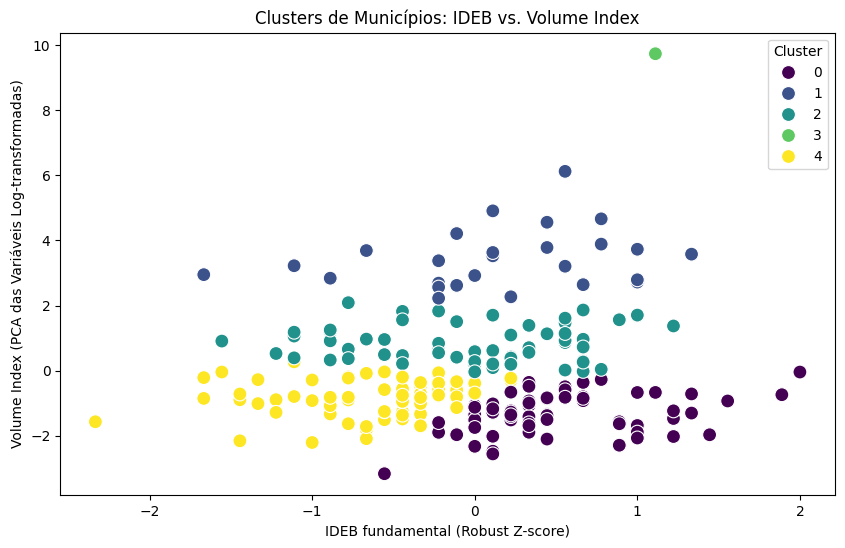

Médias por Cluster:
         IDEB_scaled  Volume_index
Cluster                           
0           0.516239     -1.319312
1           0.141026      3.433563
2          -0.028736      0.846913
3           1.111111      9.729542
4          -0.626126     -0.842809


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Supondo que df_educação seja seu DataFrame já carregado
# Lista de colunas originais
colunas = [
    'IDEB fundamental', 
    'Matrículas no ensino fundamental',
    'Matrículas no ensino médio',
    'Docentes no ensino fundamental',
    'Docentes no ensino médio'
]

# Substituir '-' por NaN e converter para numérico
df_educação[colunas] = df_educação[colunas].replace('-', np.nan)
for coluna in colunas:
    df_educação[coluna] = pd.to_numeric(df_educação[coluna], errors='coerce')

# Imputar valores ausentes com a mediana
imputer = SimpleImputer(strategy='median')
df_educação[colunas] = imputer.fit_transform(df_educação[colunas])

# Aplicar transformação logarítmica às variáveis de volume
cols_volume = [
    'Matrículas no ensino fundamental',
    'Matrículas no ensino médio',
    'Docentes no ensino fundamental',
    'Docentes no ensino médio'
]
for coluna in cols_volume:
    df_educação[coluna + '_log'] = np.log1p(df_educação[coluna])

# Nova lista de colunas para volume (transformadas)
cols_volume_log = [c + '_log' for c in cols_volume]

# Aplicar o RobustScaler para o IDEB e para as variáveis de volume transformadas
scaler = RobustScaler()
# Escalonar o IDEB
ideb_scaled = scaler.fit_transform(df_educação[['IDEB fundamental']])
# Escalonar as variáveis de volume transformadas
volume_scaled = scaler.fit_transform(df_educação[cols_volume_log])

# Agregar as variáveis de volume com PCA (extraindo o primeiro componente)
pca = PCA(n_components=1)
volume_index = pca.fit_transform(volume_scaled)

# Criar um DataFrame com o espaço bidimensional
# Eixo X: IDEB fundamental (escalonado)
# Eixo Y: volume_index
df_cluster = pd.DataFrame({
    'IDEB_scaled': ideb_scaled.flatten(),
    'Volume_index': volume_index.flatten()
})

# Método do Cotovelo para K-means (testar de 1 a 10 clusters)
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("WCSS")
plt.title("Método do Cotovelo para Escolha de k")
plt.xticks(k_range)
plt.show()

# Escolha um valor de k (por exemplo, 3 ou 4 conforme o gráfico)
k_escolhido = 5  # ajuste conforme o seu gráfico
kmeans_final = KMeans(n_clusters=k_escolhido, random_state=42)
clusters = kmeans_final.fit_predict(df_cluster)
df_cluster['Cluster'] = clusters

# Visualização dos clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='IDEB_scaled',
    y='Volume_index',
    hue='Cluster',
    palette='viridis',
    data=df_cluster,
    s=100
)
plt.title("Clusters de Municípios: IDEB vs. Volume Index")
plt.xlabel("IDEB fundamental (Robust Z-score)")
plt.ylabel("Volume Index (PCA das Variáveis Log-transformadas)")
plt.legend(title="Cluster")
plt.show()

# Análise dos clusters
print("Médias por Cluster:")
print(df_cluster.groupby('Cluster').mean())


In [43]:
# Criar um novo DataFrame com as métricas originais e os clusters atribuídos
df_resultado = df_educação.copy()

# Adicionar os clusters ao DataFrame original
df_resultado['Cluster'] = df_cluster['Cluster'].values

# Calcular a proximidade do cluster (distância euclidiana ao centro mais próximo)
distancias = kmeans_final.transform(df_cluster[['IDEB_scaled', 'Volume_index']])
df_resultado['Proximidade_Cluster'] = np.min(distancias, axis=1)

# Salvar como CSV
df_resultado.to_csv('resultado_clusters.csv', index=False, encoding='utf-8')

# Exibir as primeiras linhas do resultado
df_resultado.head()


,Municípios,IDEB fundamental,Matrículas no ensino fundamental,Matrículas no ensino médio,Docentes no ensino fundamental,Docentes no ensino médio,População no último censo,Matrículas no ensino fundamental_log,Matrículas no ensino médio_log,Docentes no ensino fundamental_log,Docentes no ensino médio_log,Cluster,Proximidade_Cluster
0,Acauã,5.6,764.0,228.0,53.0,15.0,6420,6.639876,5.433722,3.988984,2.772589,0,0.821743
1,Agricolândia,5.2,661.0,208.0,54.0,27.0,4940,6.495266,5.342334,4.007333,3.332205,0,0.832550
2,Água Branca,5.6,2454.0,606.0,161.0,53.0,17573,7.805882,6.408529,5.087596,3.988984,2,1.327504
3,Alagoinha do Piauí,5.7,750.0,165.0,61.0,18.0,6819,6.621406,5.111988,4.127134,2.944439,0,0.894777
4,Alegrete do Piauí,5.0,568.0,151.0,44.0,17.0,4634,6.343880,5.023881,3.806662,2.890372,0,0.304983


In [44]:
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go

# -------------------------------
# 1. Certificar-se de que df_educação tem o Cluster correto
# -------------------------------

# Verificar se df_cluster tem a mesma ordem que df_educação
df_educação = df_educação.copy()  # Evitar modificações indesejadas
df_educação['Cluster'] = df_cluster['Cluster'].values  # Garantir a correspondência correta

# Converter Cluster para string para evitar problemas na visualização
df_educação['Cluster'] = df_educação['Cluster'].astype(str)

# -------------------------------
# 2. Carregar o shapefile dos municípios do Piauí
# -------------------------------
shapefile_path = 'PI_Municipios_2022.shp'
gdf = gpd.read_file(shapefile_path)

# Normalizar os nomes dos municípios no shapefile
gdf['NM_MUN'] = gdf['NM_MUN'].str.upper().str.normalize('NFKD')\
    .str.encode('ascii', errors='ignore').str.decode('utf-8')

# -------------------------------
# 3. Normalizar os nomes dos municípios no df_educação
# -------------------------------
df_educação['Municípios'] = df_educação['Municípios'].str.upper().str.normalize('NFKD')\
    .str.encode('ascii', errors='ignore').str.decode('utf-8')

# -------------------------------
# 4. Mesclar os clusters com o GeoDataFrame
# -------------------------------
gdf_merged = gdf.merge(df_educação[['Municípios', 'Cluster']], 
                       left_on='NM_MUN', right_on='Municípios', how='left')

# -------------------------------
# 5. Criar um dicionário de cores para os clusters
# -------------------------------
clusters = sorted(gdf_merged['Cluster'].dropna().unique(), key=int)  # Ordenar clusters numericamente
colors_list = px.colors.qualitative.Plotly
cluster_colors = {str(cluster): colors_list[i % len(colors_list)] for i, cluster in enumerate(clusters)}

# -------------------------------
# 6. Criar o mapa interativo
# -------------------------------
fig = px.choropleth_mapbox(
    gdf_merged,
    geojson=gdf_merged.geometry,
    locations=gdf_merged.index,
    color='Cluster',
    color_discrete_map=cluster_colors,
    hover_name='NM_MUN',
    hover_data=['Cluster'],
    mapbox_style="carto-positron",
    center={"lat": -7.718, "lon": -42.728},
    zoom=6,
    opacity=0.5,
    category_orders={"Cluster": sorted(clusters, key=int)}  # Define a ordem dos clusters na legenda
)

# -------------------------------
# 7. Ajustar a legenda e exibição
# -------------------------------
fig.update_coloraxes(showscale=False)

fig.update_layout(
    legend_title_text='Clusters',
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=0.01,
        itemsizing="constant"
    ),
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)

# -------------------------------
# 8. Salvar e exibir o mapa
# -------------------------------
fig.write_html("mapa_interativo.html")
fig.show()


C:\Users\Seplan\AppData\Local\Temp\ipykernel_31724\1683251519.py:48: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [45]:
import plotly.express as px

df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()
